## Towards Adaptive Joint Node and Link Mapping Algorithms for Embedding Virtual Networks: A Conciliation Strategy



##  Substrate Graph

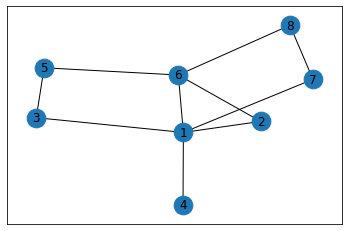

In [218]:
import networkx as nx
import random
import sys
G=nx.Graph()
G.add_node(1,weight=15)
G.add_node(2,weight=16)
G.add_node(3,weight=17)
G.add_node(4,weight=18)
G.add_node(5,weight=19)
G.add_node(6,weight=20)
G.add_node(7,weight=10)
G.add_node(8,weight=12)


G.add_edge(1,2,weight=15)
G.add_edge(1,3,weight=12)
G.add_edge(1,4,weight=14)
G.add_edge(1,7,weight=13)
G.add_edge(3,5,weight=16)
G.add_edge(6,5,weight=15)
G.add_edge(2,6,weight=15)
G.add_edge(2,1,weight=15)
G.add_edge(3,1,weight=12)
G.add_edge(4,1,weight=14)
G.add_edge(5,3,weight=16)
G.add_edge(5,6,weight=15)
G.add_edge(2,6,weight=15)
G.add_edge(1,6,weight=15)
G.add_edge(6,1,weight=15)
G.add_edge(6,8,weight=10)
G.add_edge(7,1,weight=13)
G.add_edge(7,8,weight=12)
G.add_edge(8,7,weight=12)
G.add_edge(8,6,weight=10)

nx.draw_networkx(G,with_labels=True,node_size=350)

## Function for k- shortest paths


In [219]:
#using k-shortest paths k paths  based on hop counts.
def path_pool(source,target):
    pathList=[]
    # for i in range(G.number_of_nodes()):
    #   for j in range(G.number_of_nodes()):
    #     if i!=j:
         # X = nx.shortest_simple_paths(G, i+1,j+1)
    X = nx.shortest_simple_paths(G, source,target)
    k = 3
    for counter, path in enumerate(X):
            #print(path)
            pathList.append(path)
            if counter == k-1:
                break
    return pathList
#print(pathList)



# Virtual Network Request

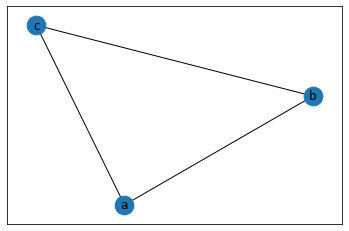

In [220]:
#virtual network request graph
G1=nx.Graph()
G1.add_node('a',weight=6)
G1.add_node('b',weight=6)
G1.add_node('c',weight=7)

G1.add_edge('a','b',weight=4)
G1.add_edge('b','c',weight=3)
G1.add_edge('c','a',weight=2)

nx.draw_networkx(G1,with_labels=True,node_size=350)


**To get minimum requirement by a virtual node**

In [221]:
min=sys.maxsize
listVNodes=[]
dicVNodes={}
#print(type(listVNodesWeights))
for w in G1.nodes(data="weight"):
  dicVNodes[w[0]]=w[1]
  listVNodes.append(w)
  if w[1]<min:
    min=w[1]
# print(listVNodes)
print("Nodes and their weights in virtual network request: ",dicVNodes)
print("Minimum requirement by a node in ith virtual network= ", min)

Nodes and their weights in virtual network request:  {'a': 6, 'b': 6, 'c': 7}
Minimum requirement by a node in ith virtual network=  6


In [222]:
listSNodes=[]
dicSNodes={}
mapped={}


#  Link Mapping

In [223]:
#edgeMap__ = {}
def linkMapping():
  flag1=1
  edgeMap = {}
  global edgeMap__
  for u,v in G1.edges: 
    print()
    print("Edge: ", (u, v))
    print("----------------")
    s_u = mapped[str(u)] 
    s_v = mapped[str(v)] 
    all_path_substrate = path_pool(s_u, s_v)
    # print(all_path_substrate)
    demand = G1.edges[(str(u), str(v))]['weight']
    # print("$$",demand)
    #valid_path = getValidPath(all_path_substrate, demand)
    r=random.randint(0,len(all_path_substrate)-1)
    temp_path=all_path_substrate[r]
    # print(temp_path)
    for i in range (len(temp_path)-1):
      # print(temp_path[i]," ",temp_path[i+1])
      #print(G[temp_path[i]][temp_path[i+1]]["weight"])
      min_cap=G.edges[temp_path[i], temp_path[i+1]]['weight']
      # print(min_cap)
      if(demand>min_cap):
        print("demand=",demand,"is greater than capacity where nodes of edge =",temp_path[i],"<=>",temp_path[i+1],"weight=",G.edges[temp_path[i], temp_path[i+1]]['weight'])
        print("Therefore link mapping is not feasible\n")
        flag1=0
    if flag1==1:
      print(temp_path)
      edgeMap[(u, v)] = temp_path
      # edgeMap[(v, u)] = temp_path
      for i in range (len(temp_path)-1):
        # print("*",G.edges[temp_path[i], temp_path[i+1]]['weight'])
        G.edges[temp_path[i], temp_path[i+1]]['weight']-=demand
        
        # G.edges[(temp_path[i], temp_path[i+1])]['weight']
        # print(G.edges[temp_path[i], temp_path[i+1]]['weight'])
    else:
      edgeMap[(u, v)] = []
      # edgeMap[(v, u)] = []
  #edgeMap__ = edgeMap
  print("\n Mapping of links after randomly selected path from k-shortest paths \n",edgeMap)




# Virtual Network Embedding


In [224]:
def virtualEmbedding():
  #population p=0
  p=0

  #chromosomes M let say equals to 1 that is M=3
  M=3

  #N=number of nodes in virtual network request
  N=len(listVNodes)

  #Q=number of trials; let say its 2
  Q=2

  #L=number of links in virtual network request
  L=G1.number_of_edges()

  visitedSNode=dict.fromkeys(range(len(listSNodes)),0)
  vistedVNode=dict.fromkeys(range(N),0)
  count=0
  flag=0
  for m in range(M):
    print("\n Making Chromosome:",m)
    print("\n")
    for n in range(N):
      for q in range(Q):
        #r=random.randint(0,len(listSNodes)-1)
        r=random.randint(0,len(listSNodes)-1)
        if visitedSNode[r]!=1 and listSNodes[r][1]>=listVNodes[n][1]:
          visitedSNode[r]=1
          vistedVNode[n]=1
          # print("$",listSNodes[n][1])
          # print("#",listSNodes[n][0])
          # print("*",listSNodes[r][1])
          # print("@",listSNodes[r][0])
          t1=listSNodes[r][1]
          t2=listVNodes[n][1]
          #print("t1",t1)
          #print("t2",t2)
          t=t1-t2
          #print(t)
          dicSNodes[listSNodes[r][0]]=t
          mapped[listVNodes[n][0]]=listSNodes[r][0]
        for i in range(N):
          if vistedVNode[i]==1:
            count=count+1
        #print("#",count)
        if(count==N):
          flag=1
          break
        else:
          count=0   
    if flag==1:
      #link Mapping
      #print("link mapping")
      print("\n Mapped nodes :",mapped)
      linkMapping()
    else:
      print("Node mapping is Not feasible you should run again as it is selecting under randomization")     


**Continuation of Algorithm**

In [225]:

for w1 in G.nodes(data="weight"):
  
  if w1[1]>=min:
    dicSNodes[w1[0]]=w1[1]
    listSNodes.append(w1)
print("Substrate Network after removing node having lesser capacity than minimum requirement of virtual network: \n",listSNodes)
if len(listSNodes)>=len(listVNodes):
  virtualEmbedding()
else:
  print("Reject the Request")

#print("dicSNodes= ",dicSNodes)

Substrate Network after removing node having lesser capacity than minimum requirement of virtual network: 
 [(1, 15), (2, 16), (3, 17), (4, 18), (5, 19), (6, 20), (7, 10), (8, 12)]

 Making Chromosome: 0



 Mapped nodes : {'a': 5, 'b': 6, 'c': 1}

Edge:  ('a', 'b')
----------------
[5, 3, 1, 6]

Edge:  ('a', 'c')
----------------
[5, 6, 1]

Edge:  ('b', 'c')
----------------
[6, 2, 1]

 Mapping of links after randomly selected path from k-shortest paths 
 {('a', 'b'): [5, 3, 1, 6], ('a', 'c'): [5, 6, 1], ('b', 'c'): [6, 2, 1]}

 Making Chromosome: 1



 Mapped nodes : {'a': 5, 'b': 4, 'c': 1}

Edge:  ('a', 'b')
----------------
[5, 6, 2, 1, 4]

Edge:  ('a', 'c')
----------------
[5, 6, 1]

Edge:  ('b', 'c')
----------------
[4, 1]

 Mapping of links after randomly selected path from k-shortest paths 
 {('a', 'b'): [5, 6, 2, 1, 4], ('a', 'c'): [5, 6, 1], ('b', 'c'): [4, 1]}

 Making Chromosome: 2



 Mapped nodes : {'a': 5, 'b': 4, 'c': 2}

Edge:  ('a', 'b')
----------------
[5, 6, 2, 